# APPM 4570/5570 Fall 2018 Project

Instructions: Answer each part of the following questions. You are permitted to collaborate with classmates, but you should ${\bf not}$ copy code or answers from anyone. All work should be your own (perhaps influenced by collaborations). Some questions will require some outside research. I am here to help!

Note that some questions require you to write out explanations and equations. I ${\bf \text{do not}}$ want these parts written by hand and turned in separately. Part of the goal of this project is for you to learn to write (very basic) LaTeX equations in the Markdown cells here in Jupyter (if you haven't done so already). Please see the following link for a tutorial: http://data-blog.udacity.com/posts/2016/10/latex-primer/.

This project will be submitted electronically to Canvas no later than ${\bf \text{Wednesday, May 2.}}$

## Problem 1

#### (a) Load the diabetes dataset (for information about this data set, see https://www.rdocumentation.org/packages/faraway/versions/1.0.7/topics/diabetes).   Construct a new data frame with the stabilized glucose, gender, and frame variables. Report summary statistics. Based on those summaries, further clean the data as necessary.  Use this new data frame on all additional parts of this question.


In [29]:
data <- read.table(paste("/Users/chern/Desktop/School/Spring 2018/APPM 4570/Project/diabetes.txt", sep = ""), header = TRUE, sep = "\t")
#colnames(data) <- c("Id", "Tot_Chol", "Stabilized_Glucose", "High_Density_Lipoprotein", "Chol/HDL_Ratio", "Glycosolated_Hemoglobin", "Location", "Age", "Gender", "Height", "Weight", "Frame", "1st SBP", "1st DPS", "2nd SBP", "2nd DPS", "Waist", "Hips", "Time")
#data <- na.omit(data)
newData <- data.frame(data$stab.glu, data$gender, data$frame)
newData <- na.omit(newData)
names(newData) <- c("Stab.Glucose", "Gender", "Frame")
summary(newData)

  Stab.Glucose      Gender       Frame    
 Min.   : 48.0   female:227   large :103  
 1st Qu.: 81.0   male  :164   medium:184  
 Median : 89.0                small :104  
 Mean   :106.5                            
 3rd Qu.:106.0                            
 Max.   :385.0                            

#### (b) Print a boxplot of the stabalized glucose, conditioning on gender. Comment on each distribution. Visually, do you see a difference between the mean stabalized glucose among males and the mean stabalized glucose among females?

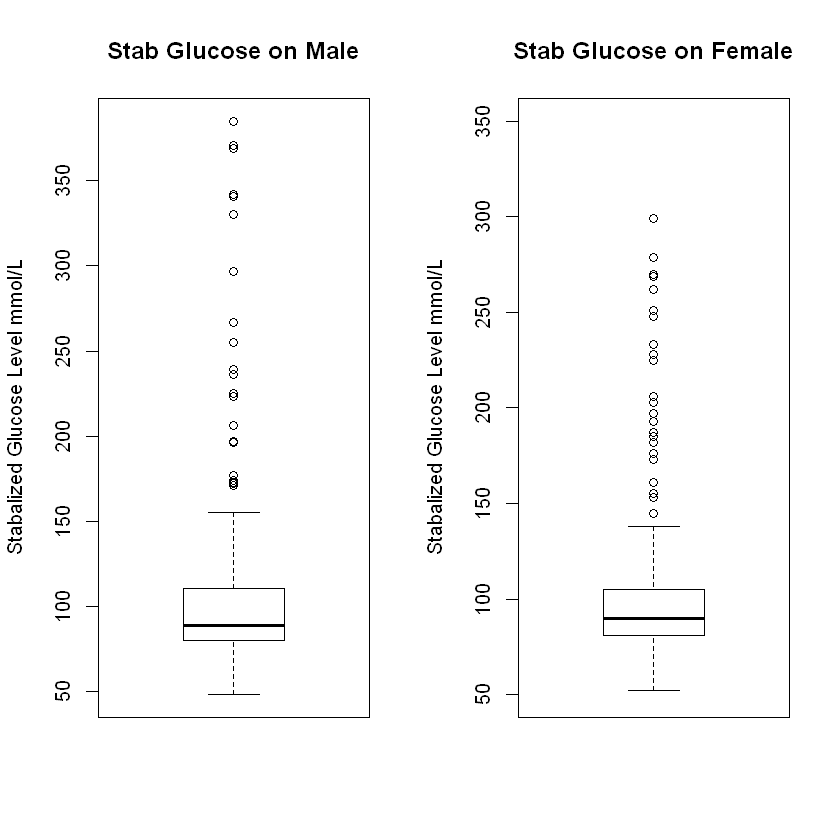

In [30]:
males <- newData[newData$Gender == "male", ]
females <- newData[newData$Gender == "female", ]
par(mfrow = c(1,2))
boxplot(males$Stab.Glucose,ylab = "Stabalized Glucose Level mmol/L", main = "Stab Glucose on Male")
boxplot(females$Stab.Glucose,ylab = "Stabalized Glucose Level mmol/L", main = "Stab Glucose on Female", ylim = c(50, 350))

Females have a lower average stabalized glucose but with a smaller range than the male counterparts. <br>
Males have a higher average stabalized glucose but with a higher range that females. The highest glucose level for a male is over 350 mmol/L <br>
Visually it is hard to tell without producing the means for each gender, they look about the same. But with calculations it is shown that males have the higher average.

#### (c) Formally test the hypothesis that there is no difference in mean stable glucose across males and females. Report the p-value and what hypothesis you would act as though is true.

In [31]:
alpha = 0.05
bar1 = mean(newData$Stab.Glucose[newData$Gender == "female"])
bar2 = mean(newData$Stab.Glucose[newData$Gender == "male"])
s1 = sd(newData$Stab.Glucose[newData$Gender == "female"])
s2 = sd(newData$Stab.Glucose[newData$Gender == "male"])
n1 = sum(newData$Gender == "female")
n2 = sum(newData$Gender == "male")
math1 = (s1^2)/n1
math2 = (s2^2)/n2
denom = sqrt(math1 + math2)
z = (bar1 - bar2)/denom
p_value = 2 * pnorm(-abs(z))
cat("P-Value: ", p_value, "\n")
if(p_value > alpha){
    cat("The hypothesis tests falls into the region that we fail to reject the null hypothesis. This means we have evidence that there is no different in the mean stable glucose level across males and females.")
} else {
     cat("The hypothesis tests falls into the region that we reject the null hypothesis. This means we have evidence that there is a different in the mean stable glucose level across males and females.")
}

P-Value:  0.1161372 
The hypothesis tests falls into the region that we fail to reject the null hypothesis. This means we have evidence that there is no different in the mean stable glucose level across males and females.

$H_0$: $\mu_2 - \mu_1$ = 0 <br>
$H_1$: $\mu_2 - \mu_1$ $\ne$ 0

#### (d) Is the confidence interval for the difference in means consistent with the result of the test? Explain.

In [32]:
cbind(((bar1 - bar2) - qnorm(1-(0.05)/2)*(denom)), (bar1-bar2) + qnorm(1-(0.05)/2) * denom)

-20.37862,2.243615


Yes the confidence interval for the difference in means is consistent with the results of the hypothesis test becuase the confidence intervals covers 0 which will be the fact there is no difference between the two stabalized glucose.

#### (e) Now, construct a boxplot of stable gluecose, conditioning on frame. Comment on each distribution. Visually, do you see a difference between the mean stabalized glucose among people of different frame sizes?

The larger the frame size of the subject the higher the average stabilized glucose level. The small frame has an
average of 95.97115 while the larger frame has an average of 121.2039 and medium has an average of 104.2935 
The medium frame and large frame has a larger quantiles than the small frame along with a large range.
Visually it is hard to hard to tell because the plots are small and the y axis labels are sparse.

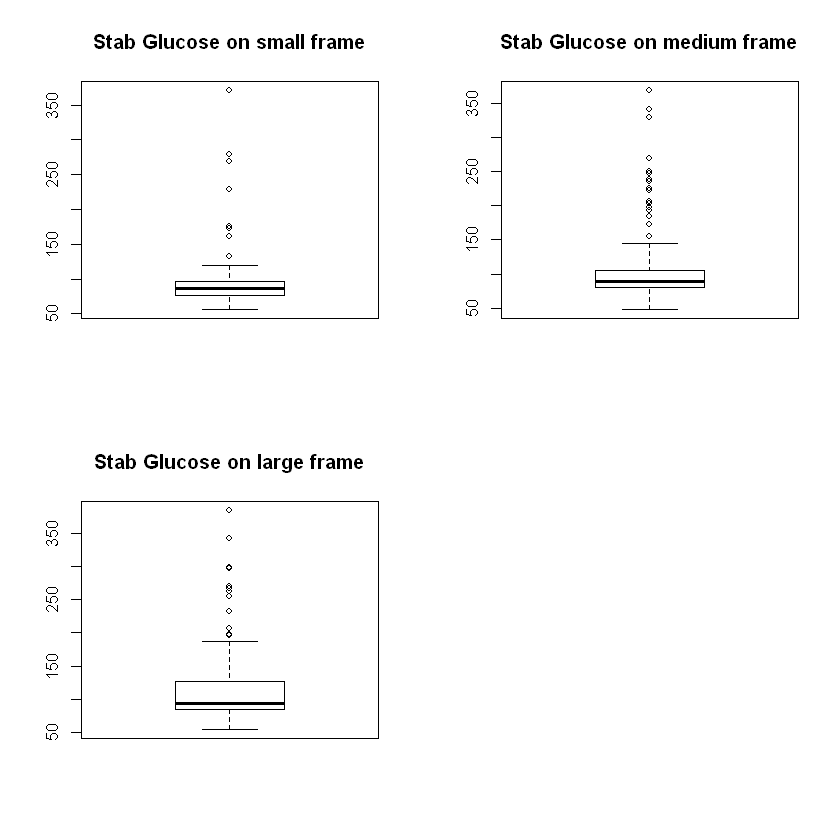

In [33]:
small <- newData[newData$Frame == "small", ]
medium <- newData[newData$Frame == "medium", ]
large <- newData[newData$Frame == "large", ]
par(mfrow = c(2,2))
boxplot(small$Stab.Glucose, main = "Stab Glucose on small frame")
boxplot(medium$Stab.Glucose, main = "Stab Glucose on medium frame")
boxplot(large$Stab.Glucose, main = "Stab Glucose on large frame")
cat("The larger the frame size of the subject the higher the average stabilized glucose level. The small frame has an\naverage of",mean(small$Stab.Glucose),"while the larger frame has an average of", mean(large$Stab.Glucose),"and medium has an average of", mean(medium$Stab.Glucose), "\nThe medium frame and large frame has a larger quantiles than the small frame along with a large range.")
cat("\nVisually it is hard to hard to tell because the plots are small and the y axis labels are sparse.")

$\textbf{(f)}$ Let's now conduct an analysis to more formally decide whether there is difference among means of stable gluecose across people of different frame sizes (the technique that we will use is called Analysis of Variance (ANOVA)). We fit a linear model 

\begin{equation}
Y_i = \beta_0 + \beta_1X_{i,m} + \beta_2X_{i,s} + \varepsilon_i, \,\,\, i = 1,...,n \,\,\,\,\,\,\,\ (1)
\end{equation}

where

1. $\varepsilon_i \sim \mathcal{N}(0, \sigma^2)$;

2. $
 X_{i,m}= 
\begin{cases}
1 \,\,\, \text{ if the } i^{th} \text{ measurement is in the "medium" group.} \\
0 \,\,\, \text{otherwise}
\end{cases};
$

3. $
 X_{i,s}= 
\begin{cases}
1 \,\,\, \text{ if the } i^{th} \text{ measurement is in the "small" group.} \\
0 \,\,\, \text{otherwise}
\end{cases};
$
and
4. $Y_i$ is the $i^{th}$ measurement of stable glucose.

 
#### (i) Write down the model for stable glucose for individuals in the large framed group.

Since $X_{i,m}$ and $X_{i,s}$ are 1 or 0 at a single time, but they are never are 1 at the same time. If $X_{i,m}$ = 1 then this person is in the medium frame and so on. Since if both are 0 you get the linear model for a large frame: <br>
<br>
$Y_i = \beta_0 + \epsilon_i$ for all i = 1,...,n

#### (ii) Fit the model in equation (1) above. [HINT: The easiest way to do this is something like ${\tt lm(response \sim predictor, data = data)}$, where the predictor is the categorical variable in the dataset.] Is there a statistically significant difference among means of stable glucose across people of different frame sizes?

In [40]:
formula = 'newData$Stab.Glucose ~ newData$Frame'
anova = lm(formula)
summary(anova)
cat("---------------------------------------------------------------------\n")
cat("\nSince the p-value on the f-test less than the standard alpha of 0.05 we can say that there is a statistically significant difference between the stablized glucose and the size of the frame.")


Call:
lm(formula = formula)

Residuals:
    Min      1Q  Median      3Q     Max 
-67.204 -26.632 -15.204   1.529 275.029 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          121.204      5.179  23.404  < 2e-16 ***
newData$Framemedium  -16.910      6.468  -2.615 0.009282 ** 
newData$Framesmall   -25.233      7.306  -3.454 0.000614 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 52.56 on 388 degrees of freedom
Multiple R-squared:  0.03135,	Adjusted R-squared:  0.02636 
F-statistic:  6.28 on 2 and 388 DF,  p-value: 0.00207


---------------------------------------------------------------------

Since the p-value on the f-test less than the standard alpha of 0.05 we can say that there is a statistically significant difference between the stablized glucose and the size of the frame.

#### (iii) What is the mean stable glucose value for a person with a large frame? Medium frame? How much higher or lower is the stable glucose of a small framed person than a large framed person?

Mean stable glucose value for a person with a large frame = 121.204 <br>
Mean stable glucose value for a person with a medium frame = 121.204 - 16.910 = 102.104 <br>
On average the stabilized glucose of a small framed person is 25.233 units lower than a large framed person.

## Problem 2

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

Each variable measured reveals a populated-weighted average score on a scale running from 0 to 10 that is tracked over time and compared against other countries. These variables currently include: real GDP per capita, social support, healthy life expectancy, freedom to make life choices, generosity, and perceptions of corruption. Each country is also compared against a hypothetical nation called Dystopia. Dystopia represents the lowest national averages for each key variable and is, along with residual error, used as a regression benchmark.


#### (a) Read in the World Happiness Report data.


In [3]:
Happydata <- read.table(paste("/Users/chern/Desktop/School/Spring 2018/APPM 4570/Project/2017.csv", sep = ","), header = TRUE, sep = ",")
head(Happydata)

Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.7966665,0.6354226,0.3620122,0.3159638,2.277027
Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.7925655,0.6260067,0.3552805,0.4007701,2.313707
Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.8335521,0.6271626,0.4755402,0.1535266,2.322715
Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.8581313,0.6200706,0.2905493,0.3670073,2.276716
Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.8091577,0.6179509,0.2454828,0.3826115,2.430182
Netherlands,6,7.377,7.427426,7.326574,1.503945,1.428939,0.8106961,0.5853845,0.4704898,0.2826618,2.294804


#### (b) Load the ${\tt ggplot2 }$ and ${\tt ggcorrplot }$  libraries. Construct a correlation matrix consisting of the happiness score, GDP, Family, life expectancy, freedom, generosity, and trust government corruption (you can do this with the ${\tt corr()}$ function). Then, use that correlation matrix in the ${\tt ggcorrplot}$ function to create a visually pleasing correlation plot. Comment on the relationships between these variables.

,Happiness Score,GDP,Family,Life Expectancy,Freedom,Generosity,Government Trust Corruption
Happiness Score,1.0000000,0.81246875,0.75273667,0.78195062,0.5701372,0.15525584,0.4290797
GDP,0.8124688,1.00000000,0.68829631,0.84307664,0.3698734,-0.01901125,0.3509441
Family,0.7527367,0.68829631,1.00000000,0.61208006,0.4249658,0.05169263,0.2318414
Life Expectancy,0.7819506,0.84307664,0.61208006,1.00000000,0.3498268,0.06319149,0.2797520
Freedom,0.5701372,0.36987339,0.42496576,0.34982679,1.0000000,0.31608271,0.4991828
Generosity,0.1552558,-0.01901125,0.05169263,0.06319149,0.3160827,1.00000000,0.2941595
Government Trust Corruption,0.4290797,0.35094410,0.23184139,0.27975198,0.4991828,0.29415945,1.0000000


Many of the variables do not have a correlation with each other and only have a correlation with itself which is good. This means that a linear model with these variables will not have the problem with collinearity,

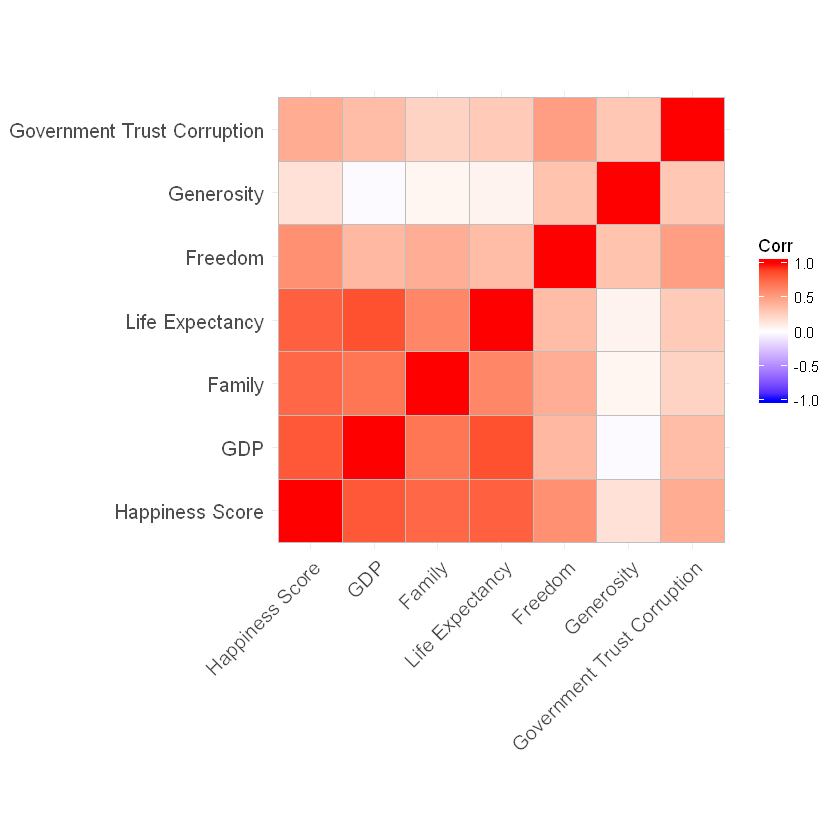

In [5]:
library(ggcorrplot)
library(ggplot2)
neededData = data.frame(Happydata$Happiness.Score, Happydata$Economy..GDP.per.Capita.,Happydata$Family, Happydata$Health..Life.Expectancy., Happydata$Freedom, Happydata$Generosity, Happydata$Trust..Government.Corruption.)
colnames(neededData) <- c("Happiness Score", "GDP", "Family", "Life Expectancy", "Freedom", "Generosity", "Government Trust Corruption")
correlation = cor(neededData)
correlation
ggcorrplot(correlation)
cat("Many of the variables do not have a correlation with each other and only have a correlation with itself which is good. This means that a linear model with these variables will not have the problem with collinearity,")

#### (c) Construct a multiple linear regression model where the happiness score is the response, and the remaining variables used in (b) as predictors. Print a summary of this model. 

In [11]:
formula = 'Happydata$Happiness.Score ~ Happydata$Economy..GDP.per.Capita. + Happydata$Family + Happydata$Health..Life.Expectancy. + Happydata$Freedom + Happydata$Generosity + Happydata$Trust..Government.Corruption.'
lmodfull = lm(formula)
summary(lmodfull)


Call:
lm(formula = formula)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.52798 -0.25219 -0.02277  0.28526  1.20417 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                               1.7430     0.1874   9.303  < 2e-16
Happydata$Economy..GDP.per.Capita.        0.7844     0.2045   3.836 0.000185
Happydata$Family                          1.1178     0.2021   5.532 1.40e-07
Happydata$Health..Life.Expectancy.        1.2889     0.3215   4.009 9.65e-05
Happydata$Freedom                         1.4757     0.3425   4.309 2.98e-05
Happydata$Generosity                      0.3807     0.3293   1.156 0.249524
Happydata$Trust..Government.Corruption.   0.8266     0.4843   1.707 0.089975
                                           
(Intercept)                             ***
Happydata$Economy..GDP.per.Capita.      ***
Happydata$Family                        ***
Happydata$Health..Life.Expectancy.      ***
Happydata$Freedo

#### (d) What is the percent of variability in happiness score that can be explained by GDP, Family, life expectancy, freedom, generosity, and trust government corruption?

The percent of variability in happiness score that can be explained by GPD, family, life expectancy, freedom, generosity, and trust government corruption is 0.8124 or 81.24%

#### (e) Predict the happiness score for a country with (sample) average values for GDP, Family, life expectancy, freedom, generosity, and trust government corruption. 

In [48]:
GDP = mean(Happydata$Economy..GDP.per.Capita.)
Fam = mean(Happydata$Family)
Life = mean(Happydata$Health..Life.Expectancy.)
Free = mean(Happydata$Freedom)
Generosity = mean(Happydata$Generosity)
Trust = mean(Happydata$Trust..Government.Corruption.)
prediction = 1.743 + (0.7844 * GDP) + (1.1178 * Fam) + (1.2889 * Life) + (1.4757 * Free) + (0.3807 * Generosity) + (0.8266 * Trust)
cat("The predicted happiness score for a country with (sample) average values for the predictors is:", prediction)

The predicted happiness score for a country with (sample) average values for the predictors is: 5.353991

#### (f) Interpret the coefficient associated with life expectancy.

The coefficient associated with life expectancy ($\widehat{\beta_3}$) is the average change in life expextancy associated with a 1-unit change in the happiness score.

#### (g) Assess the multiple linear regression assumptions. Are any of them violated with this dataset? One way to do this is plot the model you created in part (c). 

There are no violations with this dataset which you can see by the Residuals vs. Fitted graph as they are all
centered around 0 with a little noise creating a scatter. This also shows that errors are uncorrelated. It also seems like the error is distributed normally. 

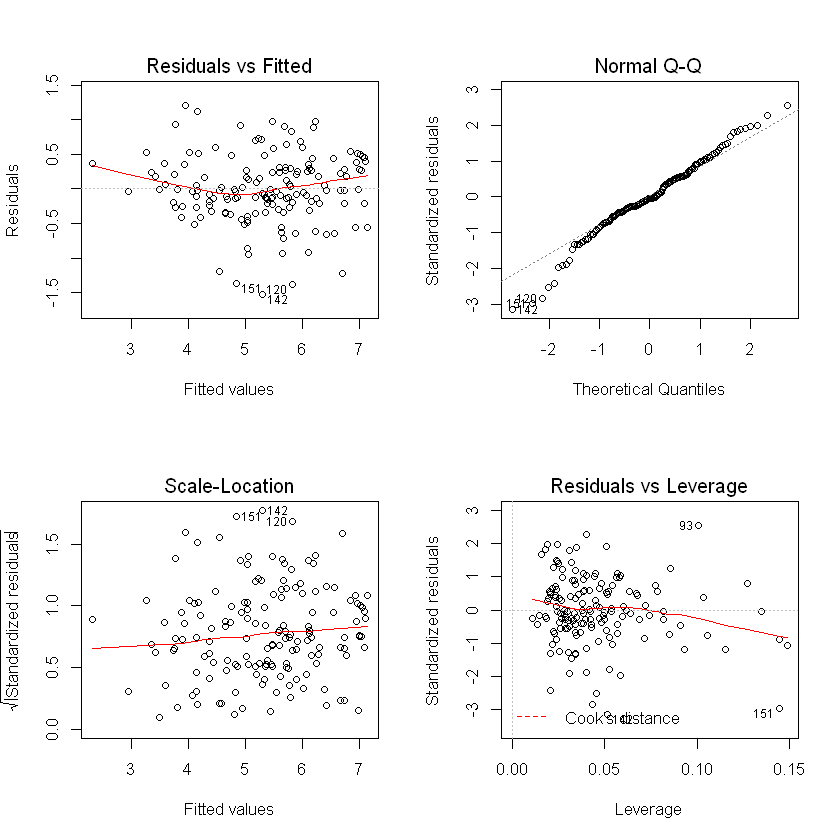

In [46]:
par(mfrow = c(2,2))
plot(lmod)
cat("There are no violations with this dataset which you can see by the Residuals vs. Fitted graph as they are all\ncentered around 0 with a little noise creating a scatter. This also shows that errors are uncorrelated. It also seems like the error is distributed normally. ")

#### (h) Consider the reduced model with only GDP, life expectancy, and freedom. Is this model sufficient? Base your answer on some formal measure of "sufficient".

In [27]:
#Going to preform a partial f-test to see if the model is sufficient
formula = 'Happydata$Happiness.Score ~ Happydata$Economy..GDP.per.Capita.+ Happydata$Health..Life.Expectancy. + Happydata$Freedom'
lmodreduced = lm(formula)
summary(lmodreduced)
anova(lmodreduced, lmod)
# summary(lmod)
cat("\n\n---------------------------------------\nMy formal measure of sufficient is a partial f-test to see if these predictors, in the reduced model, are enough.\nAccording the partial f-test preformed we can see that the p value for the reduced model is lower than alpha, \n1.03e-6 < 0.05, we can say that the reduced model is not sufficient so we would need to go with the full model from above.\n---------------------------------------")


Call:
lm(formula = formula)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.67667 -0.33040  0.01689  0.36336  1.14781 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                          2.4554     0.1448  16.959  < 2e-16 ***
Happydata$Economy..GDP.per.Capita.   1.2157     0.1975   6.156 6.43e-09 ***
Happydata$Health..Life.Expectancy.   1.4123     0.3477   4.062 7.78e-05 ***
Happydata$Freedom                    2.2575     0.3181   7.098 4.62e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5485 on 151 degrees of freedom
Multiple R-squared:  0.7695,	Adjusted R-squared:  0.7649 
F-statistic:   168 on 3 and 151 DF,  p-value: < 2.2e-16


Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
151,45.42160,NA,NA,NA,NA
148,36.96565,3,8.455947,11.28507,1.037579e-06




---------------------------------------
My formal measure of sufficient is a partial f-test to see if these predictors, in the reduced model, are enough.
According the partial f-test preformed we can see that the p value for the reduced model is lower than alpha, 
1.03e-6 < 0.05, we can say that the reduced model is not sufficient so we would need to go with the full model from above.
---------------------------------------

Collinearity is sometimes a problem in regression. Collinearity occurs when predictors in a model are correlated. In a multiple regression model with correlated predictors, estimators/coefficients may change erratically in response to small changes in the model or the data. One measure of collinearity is called the *variance inflation factor*. For each predictor in the model, define

$$VIF_j = \frac{1}{1-R_j^2},$$

where $R_j^2$ is the coefficient of determination for the model where the $j^{\text{th}}$ predictor is regressed against all the other predictors. The idea is that, if the $j^{\text{th}}$ predictor has a strong linear relationship with the other predictors, $R_j^2$ would be close to 1, and the variance inflation factor would be large. A rule of thumb is that, if $VIF_j >10$, collinearity might be a problem worthy of further investigation. (How do you investigate further? Take STAT 5010 in spring 2019 to find out!).

#### (i) Load the ${\tt car}$ library into R and use the ${\tt vif()}$ function to decide whether collinearity is a problem for the full regression model fit above.

In [55]:
formula = 'Happydata$Happiness.Score ~ Happydata$Economy..GDP.per.Capita. + Happydata$Family + Happydata$Health..Life.Expectancy. + Happydata$Freedom + Happydata$Generosity + Happydata$Trust..Government.Corruption.'
lmod2 = lm(formula)
library(car)
vif(lmod2)
cat("I would say collinearity is not a problem for the full regression model fit above because there is no value of VIF\nthat is over 10.")

Happydata$Economy..GDP.per.Capita.                        Happydata$Family 
                               4.566281                                2.077338 
     Happydata$Health..Life.Expectancy.                       Happydata$Freedom 
                               3.582433                                1.627405 
                   Happydata$Generosity Happydata$Trust..Government.Corruption. 
                               1.214765                                1.494767

I would say collinearity is not a problem for the full regression model fit above because there is no value of VIF
that is over 10.

## Problem 3

In this question, we will explore a method for fitting a regression model where the predictor variable is partitioned into intervals, and on each interval, a different linear relationship exists between the predictor and response. We are interested in fitting separate line segments to each interval such that the overall model is a continuous function.



#### (a) Load the ${\tt plant}$ dataset into R. Plot measurements of the plant organ, $y$, as a function of time, ${\tt time}$, using colors to differentiate attributes of the plant organ, ${\tt group}$.  


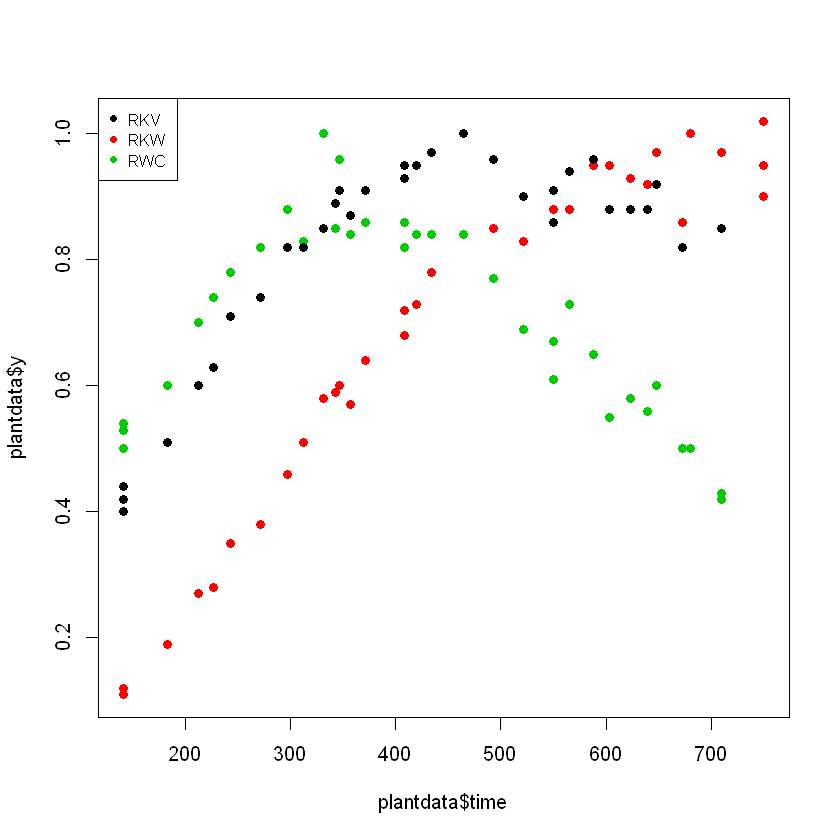

In [2]:
plantdata <- read.table(paste("/Users/chern/Desktop/School/Spring 2018/APPM 4570/Project/plant.txt", sep = ""), header = TRUE, sep = "\t")
plot(plantdata$time, plantdata$y, col=plantdata$group, pch = 16)
legend('topleft', legend = levels(plantdata$group), col = 1:3, cex = 0.8, pch = 16)

## Notice that, conditioned on RKV, the time variable seems to be partitioned into two groups: a group where time is less than 400, and a group where time is greater than 400. We will fit the following model:

$$Y_i = \beta_0 + \beta_1f_1(X_i) + \beta_2f_2(X_i) + \varepsilon_i, \,\,\, i = 1,...,n, \,\,\,\,\,\, (1) $$

where:

1. $\varepsilon_i \sim \mathcal{N}(0, \sigma^2)$;

2. $
f_1(X) = 
\begin{cases}
400 - X \,\,\, \text{ if }  \,\,\, X \le 400 \\
0 \,\,\, \text{otherwise}
\end{cases};
$

3. $
f_2(X) = 
\begin{cases}
 X - 400 \,\,\, \text{ if }  \,\,\, X \ge 400 \\
0 \,\,\, \text{otherwise}
\end{cases};
$

4. $X$ is the time variable for group RKV; and

5. $Y$ is the measurement variable for group RKV.

#### (b) This model fits separate lines to the data before and after the "change point" of $400$. Write R code for the functions $f_1(x)$ and $f_2(x)$. 

In [3]:
f1 = function(x)ifelse (x < 400, 400 - x, 0)
f2 = function(x)ifelse (x > 400, x - 400, 0)

#### (c) Using the model in (1), write down the equation of the line that is fit to the data to the left of the change point. Write down the equation of the line that is fit to the data to the right of the change point. Justify your answers.

$\textbf{Left-Of-Change-Point:}$ $Y_i = \beta_0 + \beta_1(400 - X_i) + \beta_2(0) + \varepsilon_i$ $\rightarrow$ $Y_i = \beta_0 + \beta_1(400 - X_i)+ \varepsilon_i$ <br>
<br>
$\textbf{Right-Of-Change-Point:}$ $Y_i = \beta_0 + \beta_1(0) + \beta_2(X_i - 400) + \varepsilon_i$ $\rightarrow$ $Y_i = \beta_0 + \beta_2(X_i - 400) + \varepsilon_i$ 

#### (d) Fit the model in (1) in R, and print a summary. Should you exclude any of the (transformed) predictors from the model? Would a model with just an intercept be sufficient? Explain why or why not?

In [4]:
newdata = plantdata[plantdata$group == "RKV", ]
lmod = lm(y ~ f1(time) + f2(time), data = newdata)
summary(lmod)


Call:
lm(formula = y ~ f1(time) + f2(time), data = newdata)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.059054 -0.024047 -0.000161  0.023438  0.057910 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.871e-01  1.122e-02  87.981  < 2e-16 ***
f1(time)    -2.104e-03  8.065e-05 -26.090  < 2e-16 ***
f2(time)    -4.524e-04  7.109e-05  -6.364  5.9e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.03307 on 29 degrees of freedom
Multiple R-squared:  0.9646,	Adjusted R-squared:  0.9622 
F-statistic: 395.1 on 2 and 29 DF,  p-value: < 2.2e-16


We should not exclude any of the transformed predictors from the model because of their individual p-values are smaller than alpha. Also a model with just the intercept would not be sufficient because the p-value in the f-test statistic is under 0.05 showing that our predictors have a strong linear relationship with our response.

#### (e) Plot the model over the scatterplot of the data. Comment on the fit.

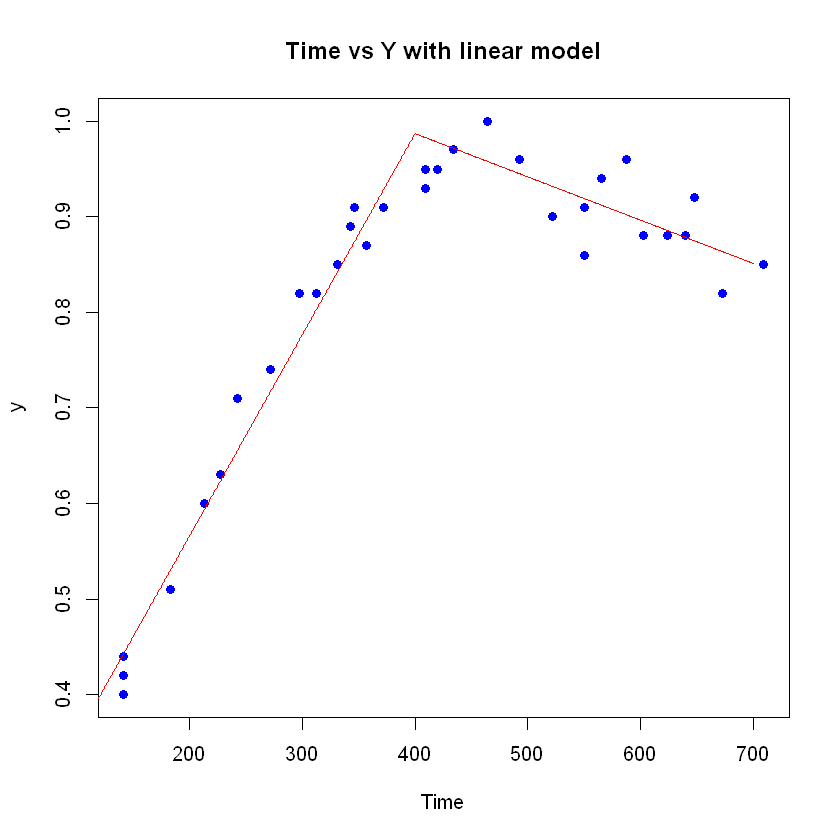

In [5]:
# plot(plantdata$time, plantdata$y, col=plantdata$group, pch = 16)
# legend('topleft', legend = levels(plantdata$group), col = 1:3, cex = 0.8, pch = 16)
# abline(lmod)
plot(newdata$time, newdata$y, ylab = "y", xlab = "Time", col = "blue", pch = 16, main = "Time vs Y with linear model")
x = seq(0, 700, length.out = 1000)
y = 0.9871 +  (-0.002104*(f1(x))) + (-0.0004524*(f2(x)))
lines(x, y, col = "red")

This model fits the data well.

#### (f) Plot the residuals against the fitted values. Comment on this plot. 

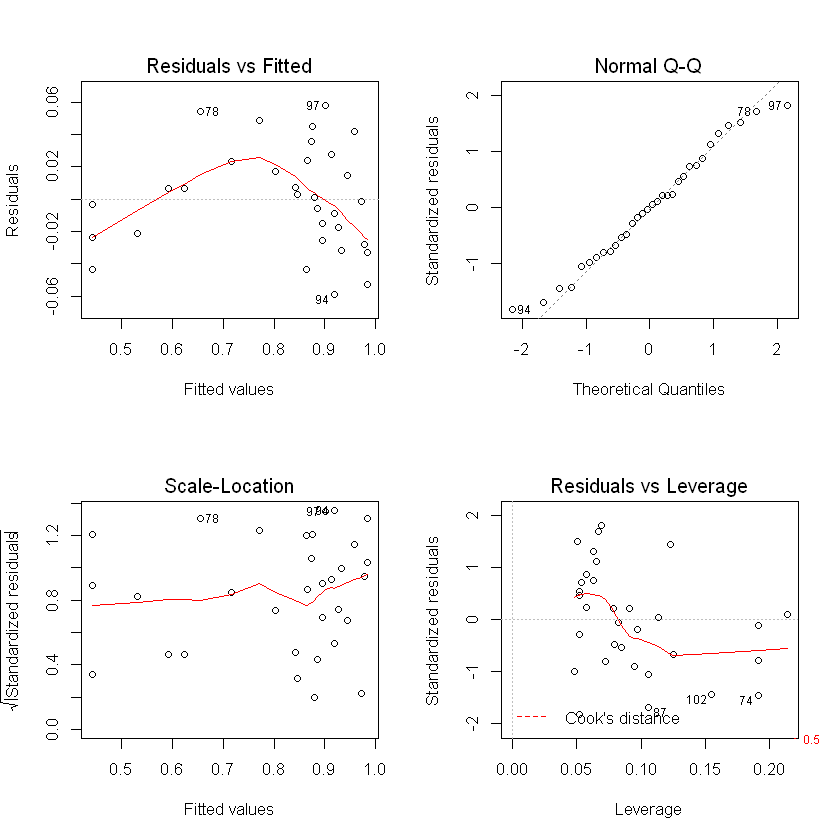

In [147]:
par(mfrow = c(2,2))
plot(lmod)

The residuals vs fitted graph is poor. The data is not centered around zero and the error does not look uniform which is created a wall at the right side of the graph. 

## Problem 4

In this class, we used the *frequentist* (or *classical*) paradigm in statistics to make inferences about a population parameter based on sample information. Many have criticized this paradigm, and much of that criticism comes from so-called *Bayesian* statisticians. The Bayesian paradigm provides another way for us to make inferences about a population parameter based on sample information. In this question, we will explore the differences in these paradigms, and learn a bit about the Bayesian paradigm.


#### (a) Conduct some research on the differences between the frequentist and Bayesian statistical paradigms, and summarize your research here (a few paragraphs will be necessary). [This article](https://plato.stanford.edu/entries/statistics/#ClaSta) might be a nice start. In particular, what do the differences here have to do with *conceptual/philosophical* issues (rather than *empirical/scientific* issues)? What do the differences have to do with the interpretation of probability theory?

  Bayesian statistical methods are presented in the forms of inferences. In Bayesian stastical hypothesis they use inferences from a prior probability which is to expressed a degree in belief in the hypotheses before that data has even been collected. A Bayesian wants a logically rigorous way of describing your prior belief and then updates it with what they observe from a new data which is called their posterior belief. Frequentists will not make any assumptions on the belief in the hypothesis before the data has been collected and analyzed. Frequentists use probability only to model certain processes after sampling. Frequentist inference is based on long-term frequencies while Bayesian inference is based on degrees on belief and degrees of logical support. Bayesians view probabilities as a general concept to represent the uncertainitity in an event or hypothesis. The thing is is that these events do not have to be repeatable. To a frequentist, probability is a long-term frequency of an event or occurence.  These events to frequentists must be repeatable random events. 
<br>
<br>
Frequentists need numbers and math to have an understanding of an event or occurence. These numbers and understandings must come from empirical evidence such as a repeatable random event. Bayesians need concepts and beliefs for their understanding. Most of Bayesian probability and statistics starts with prior knowledge and mental models. Bayesian statistical paradigms lie in mental concepts before any empirical data. Any time you run an experiment and the output is not something you expected and you change your experimement that is using a prior belief and it very much like Bayesian reasoning. The only different is that a Bayesian will generate their prior belief and then updated it with new data. 
<br>

---------------------------------------------------------------------------
As you've (hopefully) noted above, Bayesians assign a posterior probability distrubution to values of a parameter, given sample information. From this posterior, we can find point estimates (e.g., the mean of the posterior) and interval estimates (intervals along the posterior distribution containing the parameter with a specified probability). 

Consider $n = 15$ independent flips of a coin. The probability of heads, $p$, is unknown to us, and we'd like to infer something about it. We can do this with Bayes' theorem! Let $X_1,...,X_n$ represent our flips ($X_i = 1$ if heads, 0 if tails). Bayes' theorem states that:

$$\pi( p \, | \, X_1,...,X_n) = \frac{L( X_1,...,X_n \, | \, p)\pi(p)}{\pi(X_1,...,X_n)},$$ 

where $\pi( p \, | \, X_1,...,X_n)$ is the posterior probability distribution for $p$ given the data, $L( X_1,...,X_n \, | \, p)$ is the likelihood function for the data, $\pi(p)$ is the prior probability distribution on $p$, and $\pi(X_1,...,X_n)$ is the "evidence" (which can be calculated using the law of total probability). 

Let's construct a simplified version of Bayesian inference.

#### (b) First, descretize the parameter space by making a grid of $m = 100$ values for $p$ between 0 and 1. Then, create a vector of prior probabilities that assigns equally likely probabilities to each value of $p$.

In [12]:
m = 100
p = seq(0, 1, length.out = m)
prob = replicate(100, 1/100)

#### (c) We flip the coin 15 times, and count 4 heads. Calculate the probability of getting 4 heads in 15 tosses under each value of $p$  given above. These are values of the likelihood function.

In [13]:
heads = 4
flips = 15
likelihood = dbinom(heads, flips, p)

#### (d) Use Bayes' theorem and the information from previous parts to calculate the posterior distribution for each of the 100 values of $p$. Plot and describe the posterior distribution. In particular, does it look like a distribution that we've studied in class?

This looks like it is a binomial distributed. It is unimodal with a positive skew.

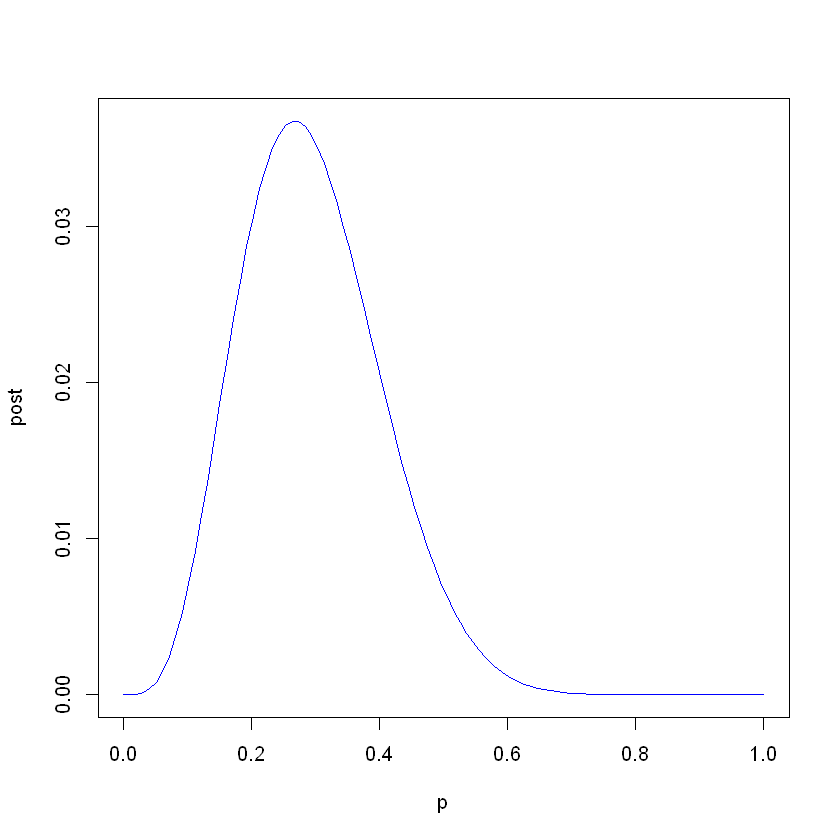

In [14]:
denom = sum(likelihood * prob)
post = (likelihood * prob)/denom
plot(p, post, type = 'l', col = "blue")
cat("This looks like it is a binomial distributed. It is unimodal with a positive skew.")

#### (e) Find a reasonable point estimate for $p$. A $(1-\alpha)\times 100\%$ *Bayesian credible interval* is a range of values within which the parameter value falls with probability $1 - \alpha$.  Use the posterior distribution found in (d) to find a 95% credible interval for $p$. 

In [32]:
point_est = p[which.max(post)]
left = max(p[cumsum(post) <= (0.05/2)])
right = min(p[cumsum(post) >= (1-(0.05/2))])
c = cbind(left, right)
cat("A reasonable point estimate for p is:", point_est,", and the confidence\ninterval is: \n")
c

A reasonable point estimate for p is: 0.2626263 , and the confidence
interval is: 


left,right
0.1010101,0.5252525


#### (f) Interpret this interval. How does the interpretation compare to the interpretation for a confidence interval for $p$? Which interpretation do you prefer?

We have a 95% chance that the probability of flipping heads on a certain coin when we flip 4 heads in 15 coin flips will be in our interval. <br>
<br>
This is very different than a confidence interval because they can use the interval as a probability where the bounds are fixed. In frequentists we treat the parameter as fixed and the bounds are random variables. I prefer confidence intervals for the fact that we need to do resampling to understand the true parameter. Bayesian credible intervals seem to loose in their interpretation. 

## Problem 5 (APPM 5570 Only)

Here, let's redo the previous problem in a more rigorous way. A modified version of Bayes' theorem states that:

$$\pi( p \, | \, X_1,...,X_n) \propto L( X_1,...,X_n \, | \, p)\pi(p),$$ 

where the functions are the same as above, and $\propto$ is read as "proportional to". In some special cases, it is relatively easy to use this version of Bayes' theorem to find the exact form of the posterior probability distribution for $p$.


#### (a) Write down the likelihood function for the coin example. The likelihood is defined as the (joint) pmf/pdf of the data, interpreted as a function of the parameter (in this case, $p$). For some help, see the solutions to homework #8, question 7, where you found a likelihood function for normal iid data.


#### (c) We will use a beta prior distribution on $p$. Write down the pdf of the beta distribution and briefly justify why it is a reasonable choice for a prior distribution in this example. 


#### (d) Compute the posterior distribution, up to the normalizing constant, using Bayes' theorem. This means you can omit all normalizing constants from your calculation. Is this posterior distribution of a particular type (e.g., normal, exponential, beta, binomial, etc.)?


#### (e) Suppose, again, that we flip our coin $n = 15$ times and get 4 heads. Compute,  plot, and interpret the posterior distribution for $p$.

#### (f) Use the properties of the posterior distribution found in (e) to report a point estimate for $p$.

#### (g) A $(1-\alpha)\times 100\%$ *Bayesian credible interval* is a range of values within which the parameter value falls with probability $1 - \alpha$.  Use the posterior distribution found in (e) to find a 95% credible interval for $p$.

#### (h) Interpret this interval. How does the interpretation compare to the interpretation for a confidence interval for $p$? Which interpretation do you prefer?

## Problem 6

So far, in class, we've worked with response variables (dependent variables) that are continuous. In this example, we will work on "logistic regression", which allows us to model a categorical response.

(a) Read in the binary data from https://stats.idre.ucla.edu/stat/data/binary.csv. 

The dataset contains several columns which we can use as predictor variables:

gpa

gre score

rank or prestige of an applicant's undergraduate alma mater

The fourth column, admit, is our binary target variable. It indicates whether or not a candidate was admitted our not.


Store rank and admit as categorical variables/factors. Print a summary of the data. Note anything interesting.

In [2]:
df <- read.table(paste("/Users/chern/Desktop/School/Spring 2018/APPM 4570/Project/binary.csv", sep = ","), header = TRUE, sep = ",")
df$rank <- as.factor(df$rank)
df$admit <- as.factor(df$admit)
head(df)
summary(df)

admit,gre,gpa,rank
0,380,3.61,3
1,660,3.67,3
1,800,4.00,1
1,640,3.19,4
0,520,2.93,4
1,760,3.00,2


 admit        gre             gpa        rank   
 0:273   Min.   :220.0   Min.   :2.260   1: 61  
 1:127   1st Qu.:520.0   1st Qu.:3.130   2:151  
         Median :580.0   Median :3.395   3:121  
         Mean   :587.7   Mean   :3.390   4: 67  
         3rd Qu.:660.0   3rd Qu.:3.670          
         Max.   :800.0   Max.   :4.000          

(b) When analyzing a statistical model, it is often useful to use some of the data to train the model and some of the data to test whether the model can make good predictions. Use the sample function to extract 20% of the data as a test set. Store the training data in a data frame called df_train, and the test data in a data frame called df_test.

In [3]:
idx = sample(1:nrow(df), size = 0.2*nrow(df))
test = df[idx,]
train = df[-idx, ]

(c) Using the training data frame, and considering admit as the response with gre and gpa as predictors, run a logistic regression. Logistic regression in R can be run using the function glm(). For the family argument in glm(), use binomial. This specifies the mean model

$$ p = \frac{e^{\beta_0 + \beta_1X_1 + \beta_2X_2}}{1 + e^{\beta_0 + \beta_1X_1 + \beta_2X_2}}, $$

where $p$ is the probability of admittance. 
Report the summary of the logistic regression model. Interpret the coefficient associated with gpa.

In [4]:
logmod = glm(admit ~ gre + gpa, family = binomial, data = train)
summary(logmod)
cat("---------------------------------------------\n\n\n")
cat("The coefficient associated with gpa (Beta 2) is the effect of the indepent variable on the odds ratio which is the probability of being admitted divided by the probability of not being admitted.")


Call:
glm(formula = admit ~ gre + gpa, family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3179  -0.8951  -0.6882   1.2760   2.1166  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -5.606052   1.225109  -4.576 4.74e-06 ***
gre          0.002731   0.001203   2.271  0.02312 *  
gpa          0.936327   0.355679   2.633  0.00848 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 399.06  on 319  degrees of freedom
Residual deviance: 379.88  on 317  degrees of freedom
AIC: 385.88

Number of Fisher Scoring iterations: 4


---------------------------------------------


The coefficient associated with gpa (Beta 2) is the effect of the indepent variable on the odds ratio which is the probability of being admitted divided by the probability of not being admitted.

(d) Use the model to predict whether the people in the test set were admited to graduate school or not. Then, calculate the accuracy of these predictions. What percent of predictions are correct?

In [5]:
predictions = round(predict(logmod, newdata = test, type = 'response'))
cat("The accuracy is: %",sum(predictions == test$admit)/length(test$admit)*100)

The accuracy is: % 61.25